In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import re

In [3]:
df = pd.read_csv('RE_ Data Science Training Material/240304 Training Assignment Dataset.csv')

## Checking Info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                378700 non-null  object 
 2   Age                   378590 non-null  float64
 3   Driving_License       377925 non-null  float64
 4   Region_Code           377876 non-null  float64
 5   Previously_Insured    377901 non-null  float64
 6   Vehicle_Age           377651 non-null  object 
 7   Vehicle_Damage        377833 non-null  object 
 8   Annual_Premium        377943 non-null  float64
 9   Policy_Sales_Channel  379154 non-null  float64
 10  Vintage               381014 non-null  float64
 11  Response              381109 non-null  int64  
dtypes: float64(7), int64(2), object(3)
memory usage: 34.9+ MB


In [5]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,378590.00000,377925.000000,377876.000000,377901.000000,377943.000000,379154.000000,381014.000000,381109.000000
mean,190555.000000,38.81855,0.997867,26.393619,0.458178,30563.769928,112.040878,154.344021,0.122563
std,110016.836208,15.50903,0.046132,13.230413,0.498249,17216.943211,54.200731,83.672192,0.327936
min,1.000000,20.00000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.00000,1.000000,15.000000,0.000000,24406.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.00000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.00000,1.000000,35.000000,1.000000,39397.000000,152.000000,227.000000,0.000000
max,381109.000000,85.00000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


## light exploring data

In [6]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44.0,1.0,28.0,0.0,> 2 Years,Yes,40454.0,26.0,217.0,1
1,2,Male,76.0,1.0,3.0,0.0,1-2 Year,No,33536.0,26.0,183.0,0
2,3,Male,47.0,1.0,28.0,0.0,> 2 Years,Yes,38294.0,26.0,27.0,1
3,4,Male,21.0,1.0,11.0,1.0,< 1 Year,No,28619.0,152.0,203.0,0
4,5,Female,29.0,NaN,41.0,1.0,< 1 Year,No,27496.0,152.0,39.0,0


In [7]:
# Label encoding with NaN preservation
label_encoded_vehicle_age = df['Vehicle_Age'].astype('category').cat.codes
label_encoded_vehicle_damage = df['Vehicle_Damage'].astype('category').cat.codes
label_encoded_gender = df['Gender'].astype('category').cat.codes

# Add label encoded columns to the DataFrame
df['Label_Encoded_Vehicle_Age'] = label_encoded_vehicle_age.replace(-1, np.nan)
df['Label_Encoded_Vehicle_Damage'] = label_encoded_vehicle_damage.replace(-1, np.nan)
df['Label_Encoded_Gender'] = label_encoded_gender.replace(-1, np.nan)


df['Label_Encoded_Vehicle_Age'] = df['Label_Encoded_Vehicle_Age'].astype(float)
df['Label_Encoded_Vehicle_Damage'] = df['Label_Encoded_Vehicle_Damage'].astype(float)
df['Label_Encoded_Gender'] = df['Label_Encoded_Gender'].astype(float)

#### Numeric Columns

In [8]:
df.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response',
       'Label_Encoded_Vehicle_Age', 'Label_Encoded_Vehicle_Damage',
       'Label_Encoded_Gender'],
      dtype='object')

In [9]:
numeric_columns = df.select_dtypes(include=['number'])

In [10]:
numeric_columns = numeric_columns[['id', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Annual_Premium', 'Policy_Sales_Channel', 'Vintage', 
       'Label_Encoded_Vehicle_Age', 'Label_Encoded_Vehicle_Damage',
       'Label_Encoded_Gender','Response']]

### Corr

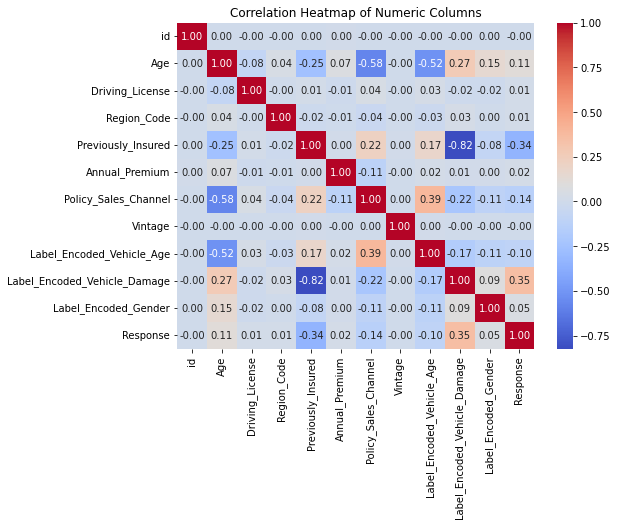

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_columns.corr(), annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap of Numeric Columns')
plt.show()

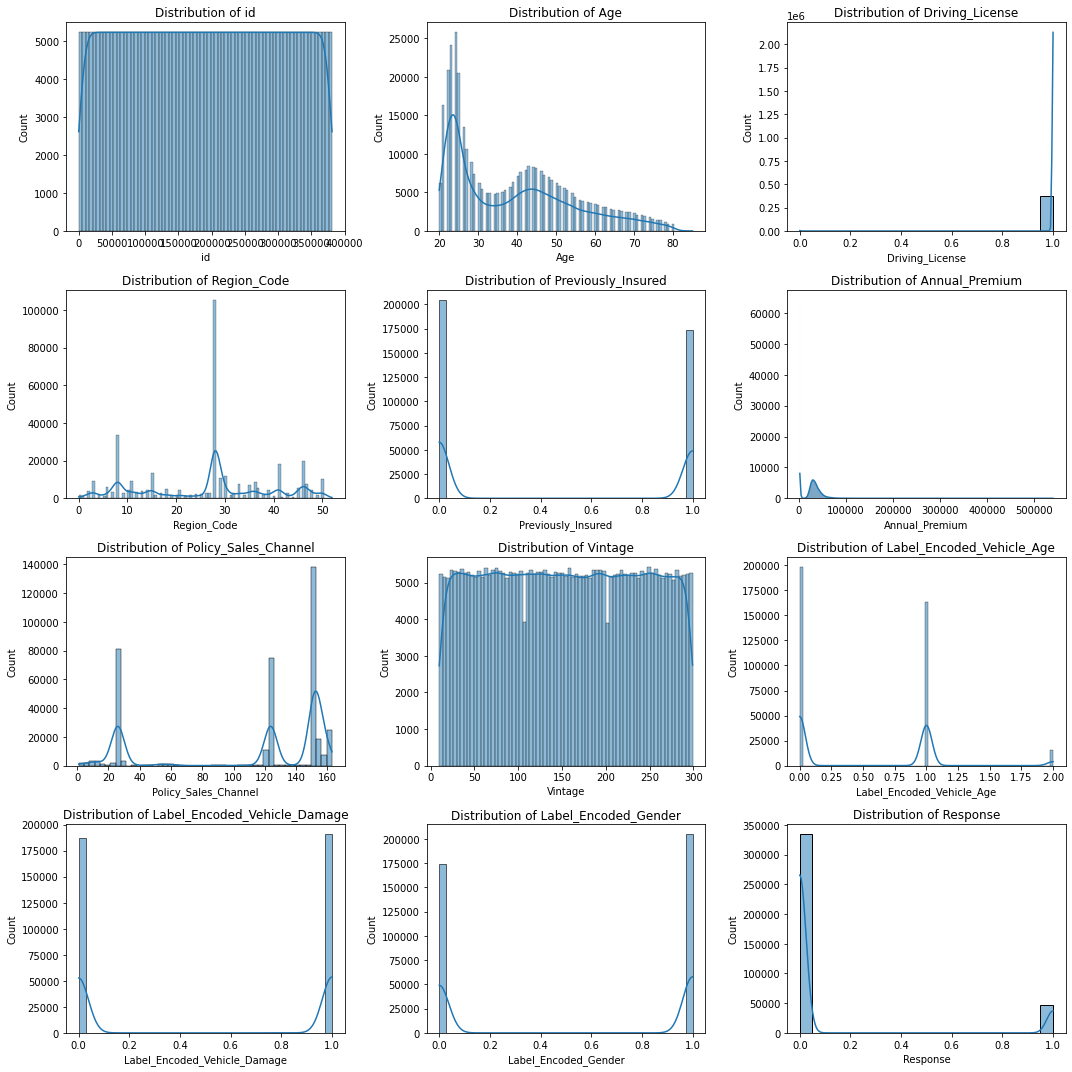

In [12]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column and plot its distribution on a subplot
for i, column in enumerate(numeric_columns.columns):
    sns.histplot(data=df, x=column, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

# Adjust layout to prevent overlap of subplots
plt.tight_layout()
plt.show()

## Histogram

array([[<AxesSubplot: title={'center': 'id'}>,
        <AxesSubplot: title={'center': 'Age'}>,
        <AxesSubplot: title={'center': 'Driving_License'}>],
       [<AxesSubplot: title={'center': 'Region_Code'}>,
        <AxesSubplot: title={'center': 'Previously_Insured'}>,
        <AxesSubplot: title={'center': 'Annual_Premium'}>],
       [<AxesSubplot: title={'center': 'Policy_Sales_Channel'}>,
        <AxesSubplot: title={'center': 'Vintage'}>,
        <AxesSubplot: title={'center': 'Response'}>],
       [<AxesSubplot: title={'center': 'Label_Encoded_Vehicle_Age'}>,
        <AxesSubplot: title={'center': 'Label_Encoded_Vehicle_Damage'}>,
        <AxesSubplot: title={'center': 'Label_Encoded_Gender'}>]],
      dtype=object)

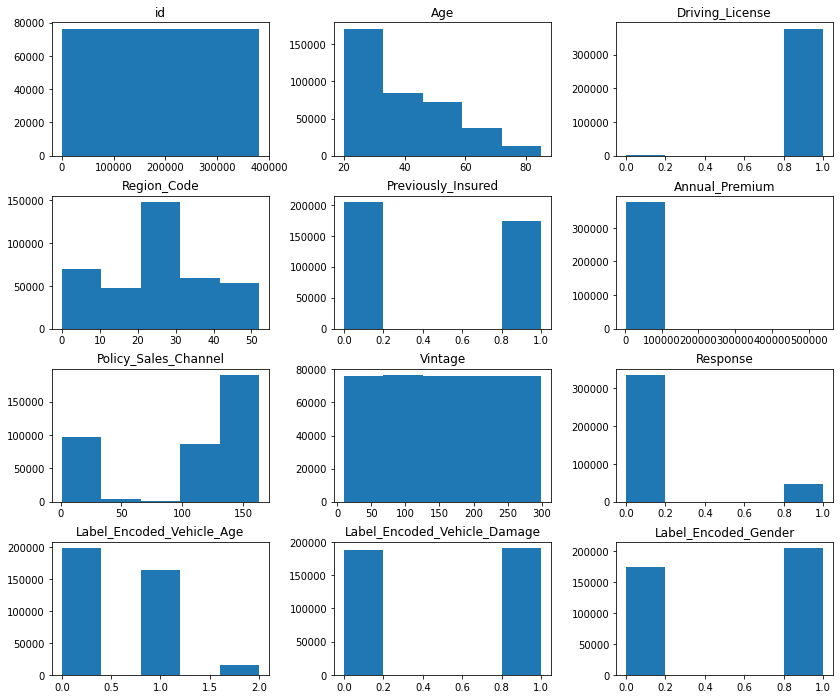

In [19]:
df.hist(bins=5, grid=False, figsize=(14, 12))

## Checking null values 

In [20]:
df.isnull().sum()

id                                 0
Gender                          2409
Age                             2519
Driving_License                 3184
Region_Code                     3233
Previously_Insured              3208
Vehicle_Age                     3458
Vehicle_Damage                  3276
Annual_Premium                  3166
Policy_Sales_Channel            1955
Vintage                           95
Response                           0
Label_Encoded_Vehicle_Age       3458
Label_Encoded_Vehicle_Damage    3276
Label_Encoded_Gender            2409
dtype: int64

In [21]:
df['Response'].value_counts()

0    334399
1     46710
Name: Response, dtype: int64

In [22]:
df.dropna().isnull().sum()

id                              0
Gender                          0
Age                             0
Driving_License                 0
Region_Code                     0
Previously_Insured              0
Vehicle_Age                     0
Vehicle_Damage                  0
Annual_Premium                  0
Policy_Sales_Channel            0
Vintage                         0
Response                        0
Label_Encoded_Vehicle_Age       0
Label_Encoded_Vehicle_Damage    0
Label_Encoded_Gender            0
dtype: int64

In [23]:
df.dropna()['Response'].value_counts()

0    330799
1     46199
Name: Response, dtype: int64

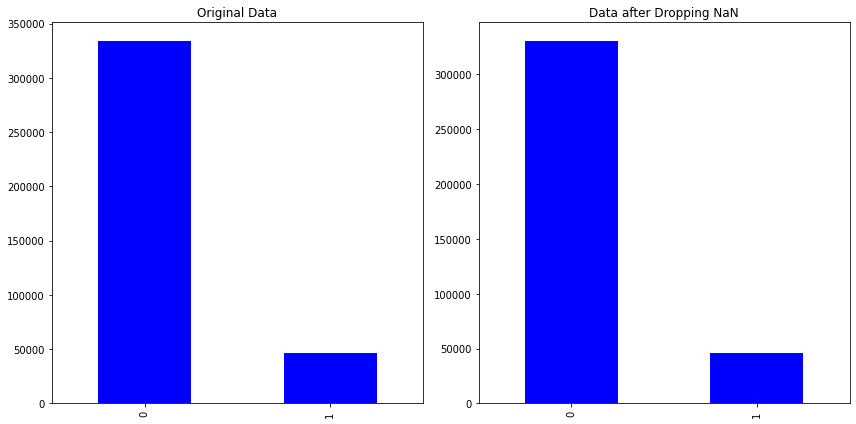

In [24]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plotting the first chart
df['Response'].value_counts().plot(kind='bar', color='blue', ax=axs[0])
axs[0].set_title('Original Data')

# Plotting the second chart
df.dropna()['Response'].value_counts().plot(kind='bar', color='blue', ax=axs[1])
axs[1].set_title('Data after Dropping NaN')

plt.tight_layout()
plt.show()

## <font color = 'red'> We Can See that after droping we are not loosing much data

In [25]:
df.dropna(inplace=True)

In [27]:
numeric_columns = df.select_dtypes(include=['number'])

#### ploting distro after removing null

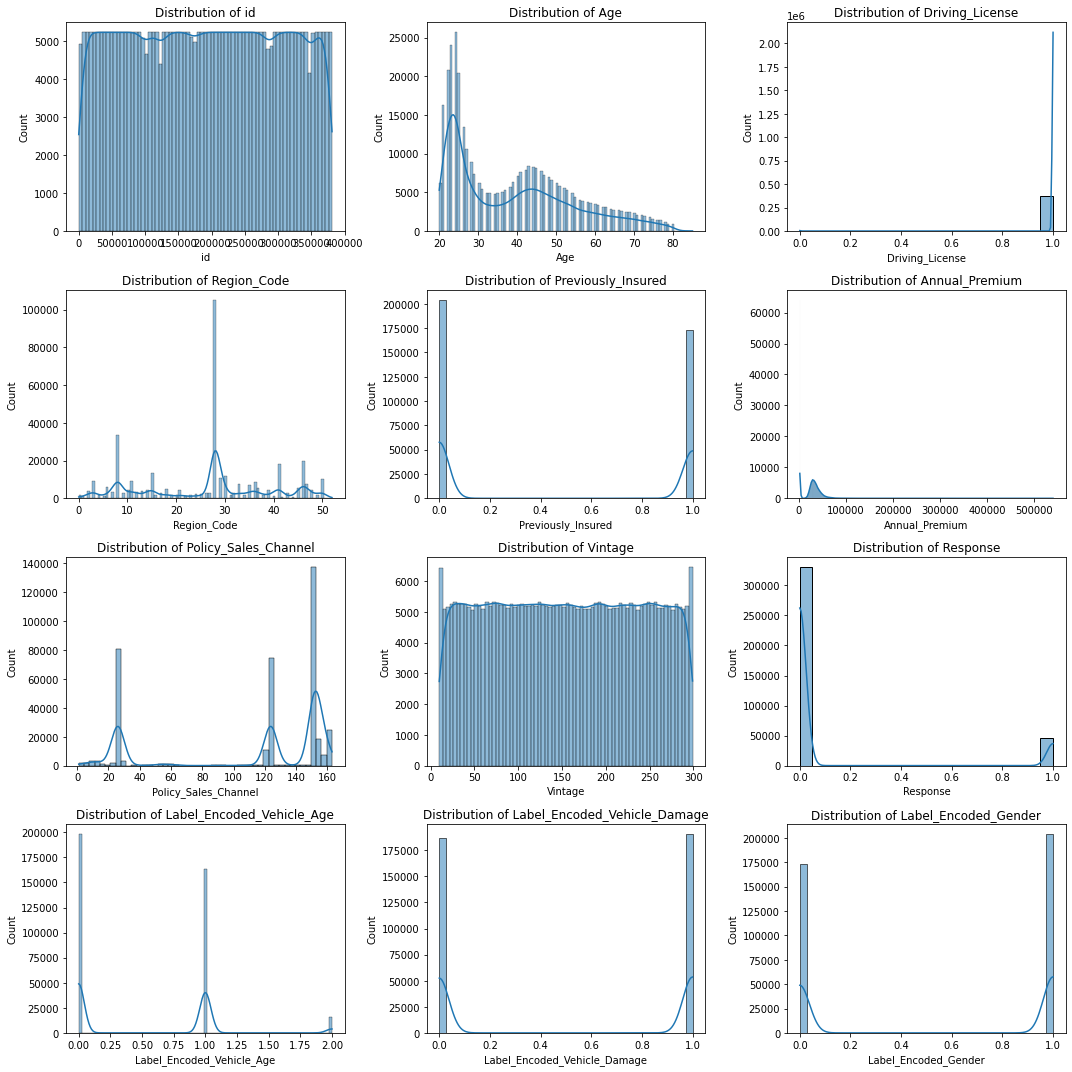

In [28]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each column and plot its distribution on a subplot
for i, column in enumerate(numeric_columns.columns):
    sns.histplot(data=df, x=column, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {column}')

# Adjust layout to prevent overlap of subplots
plt.tight_layout()
plt.show()

#### <font color = 'red'> We dont see any drastic changes 

# Outliers Imputing

In [39]:
len(numeric_columns.columns)

12

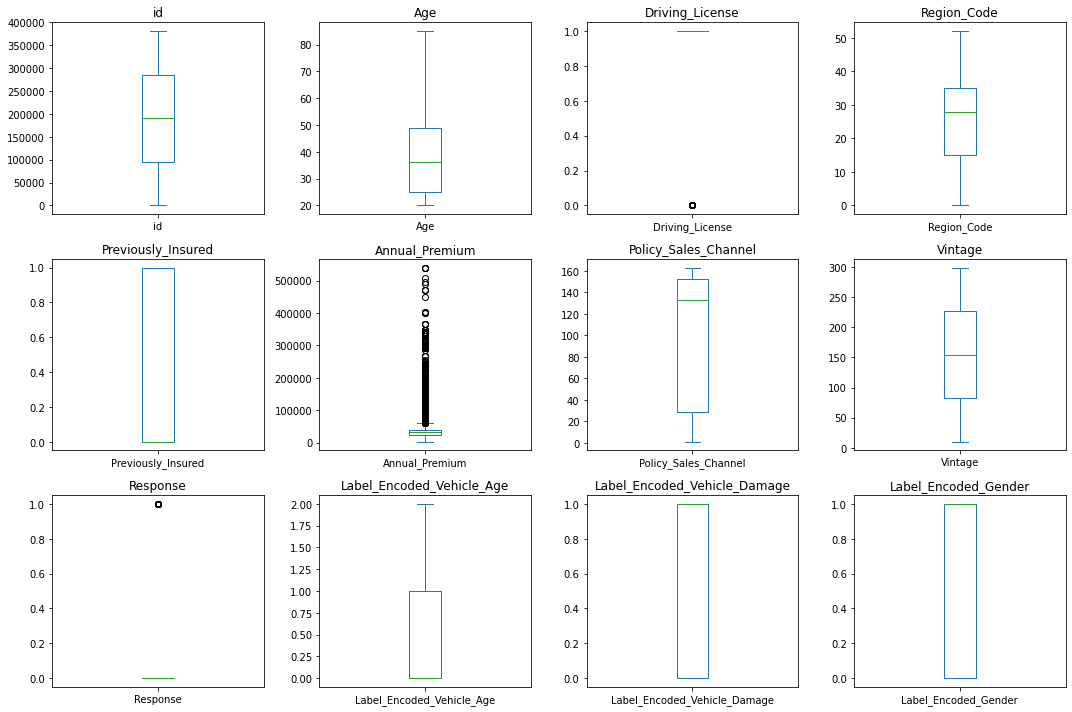

In [41]:
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Iterate over numeric columns and plot boxplots
for i, column in enumerate(numeric_columns.columns):
    numeric_columns[column].plot(kind='box', ax=axes[i])
    axes[i].set_title(column)

plt.tight_layout()
plt.show()

In [47]:
categorical_cols = []

for i in df.columns:
    print(i , df[i].nunique())
    if df[i].nunique() < 10:
        categorical_cols.append(i)

id 376998
Gender 2
Age 66
Driving_License 2
Region_Code 53
Previously_Insured 2
Vehicle_Age 3
Vehicle_Damage 2
Annual_Premium 48710
Policy_Sales_Channel 155
Vintage 290
Response 2
Label_Encoded_Vehicle_Age 3
Label_Encoded_Vehicle_Damage 2
Label_Encoded_Gender 2


In [53]:
len(categorical_cols)

9

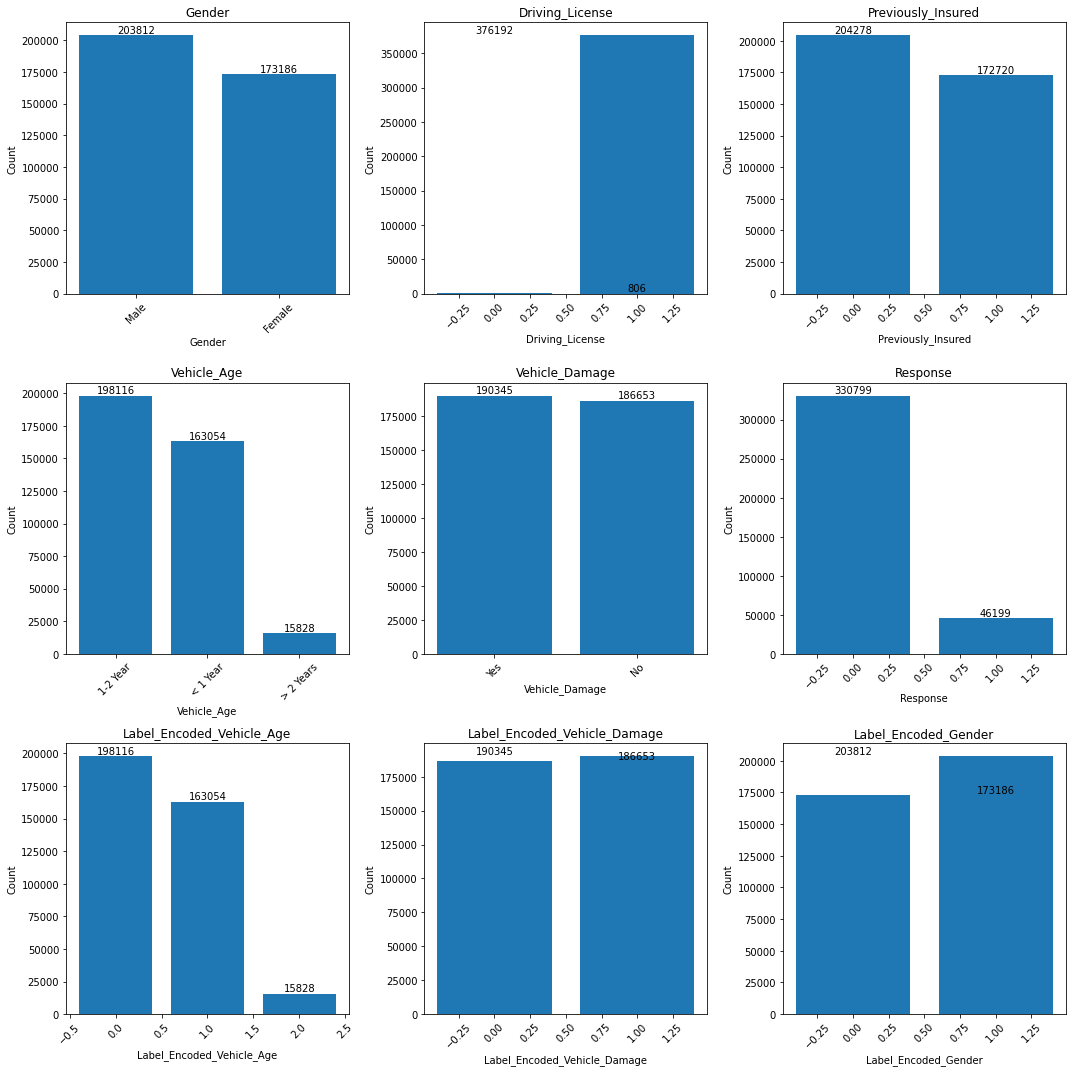

In [54]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15))  # Adjust figsize as needed

for i, ax in enumerate(axes.flatten()):
    if i < len(categorical_cols):
        col = categorical_cols[i]
        value_counts = df[col].value_counts()
        ax.bar(value_counts.index, value_counts.values)
        ax.set_title(col)
        ax.set_xlabel(col)
        ax.set_ylabel('Count')
        ax.tick_params(axis='x', rotation=45)  # Rotate x-labels for better visibility if needed

        for j, count in enumerate(value_counts):
            ax.text(j, count, str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

In [55]:
import numpy as np
import matplotlib.pyplot as plt

def fix_outliers_iqr(data, k=1.5):
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    iqr = q3 - q1
    lower_bound = q1 - k * iqr
    upper_bound = q3 + k * iqr
    
    # Identify outliers
    outliers = np.where((data < lower_bound) | (data > upper_bound))
    
    # Fix outliers
    fixed_data = np.copy(data)
    fixed_data[outliers] = np.median(data)  # Replace outliers with median
    
    return fixed_data


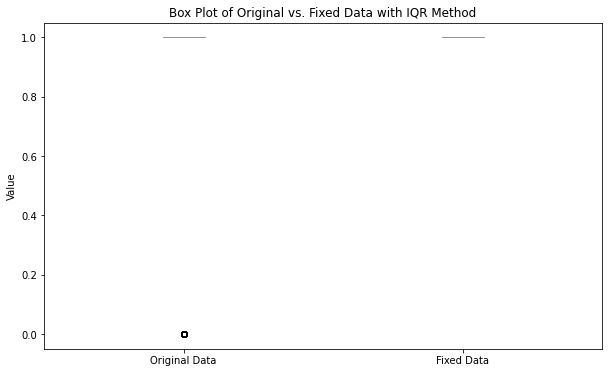

In [57]:
data = df['Driving_License']

# Fix outliers using the IQR method
fixed_data = fix_outliers_iqr(data)

# Plotting
plt.figure(figsize=(10, 6))
plt.boxplot([data, fixed_data], labels=['Original Data', 'Fixed Data'])
plt.ylabel('Value')
plt.title('Box Plot of Original vs. Fixed Data with IQR Method')
plt.show()


In [58]:
len(data) , len(fixed_data)

(376998, 376998)

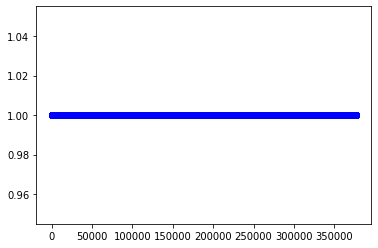

In [62]:
plt.scatter(np.arange(len(fixed_data)), fixed_data, color='blue')